In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import roman_util, util
from mejiro.helpers import gs

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-065 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-067
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


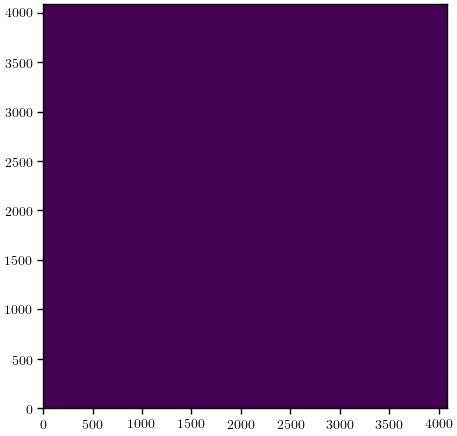

In [2]:
sca = np.zeros((4088, 4088))

plt.imshow(sca)
plt.show()

In [3]:
side = int(4088 / 4)

centers = [(side, side), (3 * side, side), (side, 3 * side), (3 * side, 3 * side), (side * 2, side * 2)]
print(centers)

[(1022, 1022), (3066, 1022), (1022, 3066), (3066, 3066), (2044, 2044)]


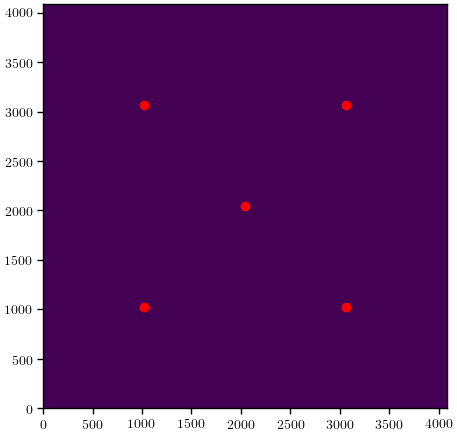

In [4]:
plt.imshow(sca)
for center in centers:
    plt.scatter(center[0], center[1], c='r')
plt.show()

In [5]:
num_scas = 18
num_points = len(centers)
num_filters = 4

print(f'Total PSFs: {num_scas * num_points * num_filters}')

Total PSFs: 360


[(1022, 1022), (1022, 3066), (3066, 1022), (3066, 3066)]


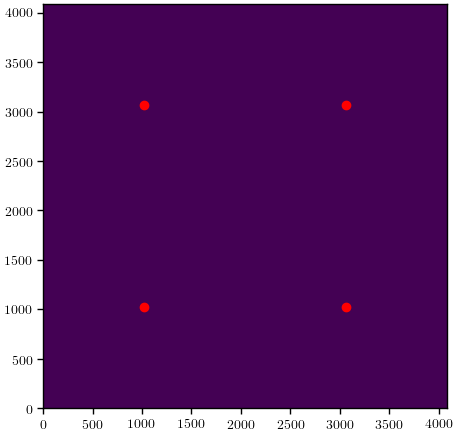

In [6]:
side = 2
num_centers = side ** 2
piece = int(4088 / num_centers)

centers = []
for i in range(num_centers):
    for j in range(num_centers):
        if i % 2 != 0 and j % 2 != 0:
            centers.append((piece * i, piece * j))

print(centers)

plt.imshow(sca)
for center in centers:
    plt.scatter(center[0], center[1], c='r')
plt.show()

In [7]:
centers = roman_util.divide_up_sca(4)
pprint(centers)

[(511, 511),
 (511, 1533),
 (511, 2555),
 (511, 3577),
 (1533, 511),
 (1533, 1533),
 (1533, 2555),
 (1533, 3577),
 (2555, 511),
 (2555, 1533),
 (2555, 2555),
 (2555, 3577),
 (3577, 511),
 (3577, 1533),
 (3577, 2555),
 (3577, 3577)]


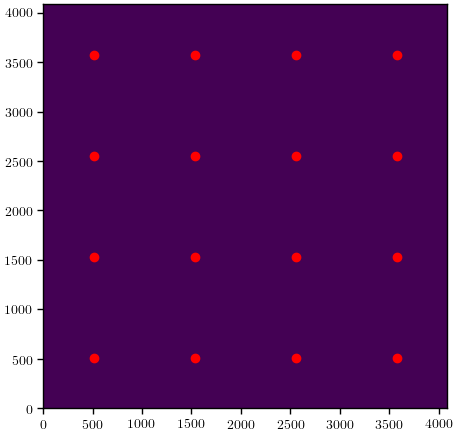

In [8]:
plt.imshow(sca)
for center in centers:
    plt.scatter(center[0], center[1], c='r')
plt.show()

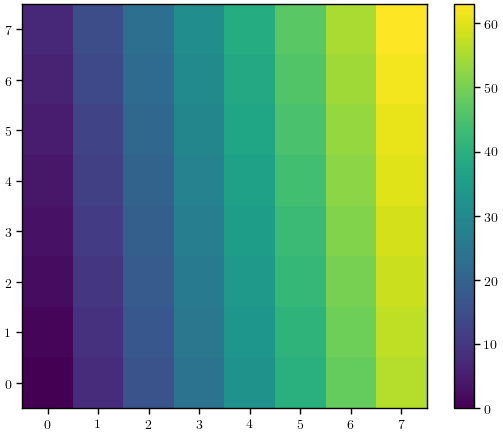

In [9]:
sides = 8
array = np.zeros((sides, sides))

for i in range(sides):
    for j in range(sides):
        array[i, j] = j * sides + i

plt.imshow(array)
plt.colorbar()
plt.show()

In [10]:
def divide_up_sca(sides):
    assert sides % 2 == 0, "For now, sides must be even"

    num_centers = sides ** 2
    piece = int(4088 / num_centers)

    centers = []
    for i in range(num_centers):
        for j in range(num_centers):
            if i % 2 != 0 and j % 2 != 0:
                centers.append((piece * i, piece * j))
    return centers

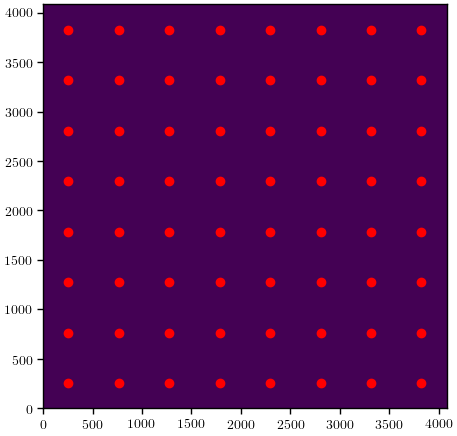

In [11]:
coords = divide_up_sca(4)

plt.imshow(sca)
for coord in coords:
    plt.scatter(coord[0], coord[1], c='r')
plt.show()

In [12]:
def find_center_coordinates(array_size, num_sub_arrays_per_dimension):
    if array_size % num_sub_arrays_per_dimension != 0:
        raise ValueError("The array_size must be evenly divisible by num_sub_arrays_per_dimension")
    
    sub_array_size = array_size // num_sub_arrays_per_dimension
    center_coordinates = []
    
    for i in range(num_sub_arrays_per_dimension):
        for j in range(num_sub_arrays_per_dimension):
            center_x = (i * sub_array_size) + (sub_array_size // 2)
            center_y = (j * sub_array_size) + (sub_array_size // 2)
            center_coordinates.append((center_x, center_y))
    
    return center_coordinates

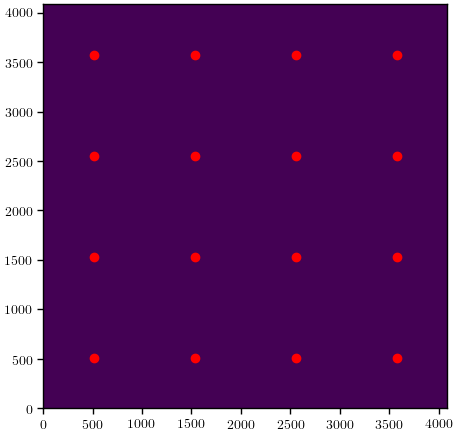

In [13]:
# Example usage:
array_size = 4088  # Size of the 2D square array
sub_array_count = 4  # Number of square sub-arrays
centers = find_center_coordinates(array_size, sub_array_count)

plt.imshow(sca)
for coord in centers:
    plt.scatter(coord[0], coord[1], c='r')
plt.show()

[(681, 681),
 (681, 2044),
 (681, 3407),
 (2044, 681),
 (2044, 2044),
 (2044, 3407),
 (3407, 681),
 (3407, 2044),
 (3407, 3407)]


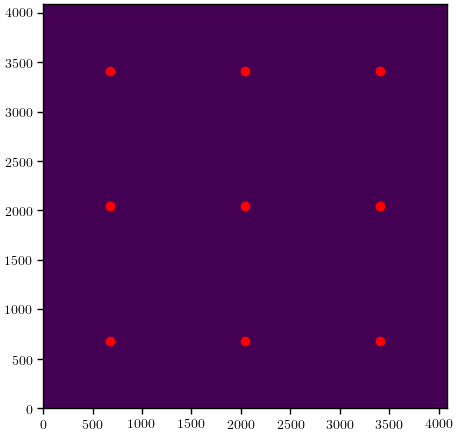

In [14]:
def find_center_coordinates(array_size, num_sub_arrays_per_dimension):
    sub_array_size = array_size / num_sub_arrays_per_dimension
    center_coordinates = []

    for i in range(num_sub_arrays_per_dimension):
        for j in range(num_sub_arrays_per_dimension):
            center_x = int(round((i + 0.5) * sub_array_size))
            center_y = int(round((j + 0.5) * sub_array_size))
            center_coordinates.append((center_x, center_y))
    
    return center_coordinates

# Example usage:
array_size = 4088  # Size of the 2D square array
sub_array_count = 3  # Number of square sub-arrays
centers = find_center_coordinates(array_size, sub_array_count)
pprint(centers)

plt.imshow(sca)
for coord in centers:
    plt.scatter(coord[0], coord[1], c='r')
plt.show()

[(681, 681),
 (681, 2044),
 (681, 3407),
 (2044, 681),
 (2044, 2044),
 (2044, 3407),
 (3407, 681),
 (3407, 2044),
 (3407, 3407)]


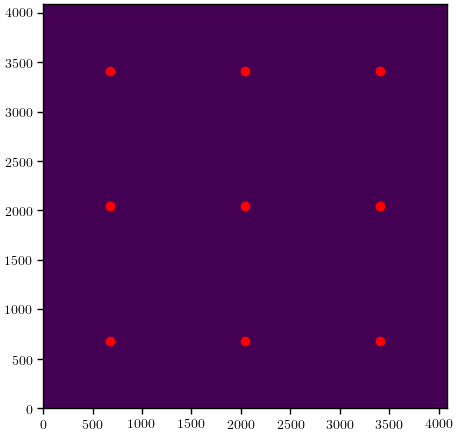

In [15]:
def divide_up_sca(sides):
    sub_array_size = 4088 / sides
    centers = []

    for i in range(sides):
        for j in range(sides):
            center_x = int(round((i + 0.5) * sub_array_size))
            center_y = int(round((j + 0.5) * sub_array_size))
            centers.append((center_x, center_y))
    
    return centers

array_size = 4088  # Size of the 2D square array
sub_array_count = 3  # Number of square sub-arrays
centers = find_center_coordinates(array_size, sub_array_count)
pprint(centers)

plt.imshow(sca)
for coord in centers:
    plt.scatter(coord[0], coord[1], c='r')
plt.show()